In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [4]:
aisle = pd.read_csv('aisles.csv')
order_product = pd.read_csv('order_products.csv')
order = pd.read_csv('orders.csv')
product = pd.read_csv('products.csv')

In [5]:
df1 = pd.merge(product, aisle, on='aisle_id', how='left')
df2 = pd.merge(order_product, df1, on='product_id', how='left')
table_aisle = pd.merge(order, df2, on='order_id', how='left')
table_aisle

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,aisle
0,2539329,1,1,2,8,NaN,196.0,1.0,Soda,77.0,7.0,soft drinks
1,2539329,1,1,2,8,NaN,14084.0,2.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,soy lactosefree
2,2539329,1,1,2,8,NaN,12427.0,3.0,Original Beef Jerky,23.0,19.0,popcorn jerky
3,2539329,1,1,2,8,NaN,26088.0,4.0,Aged White Cheddar Popcorn,23.0,19.0,popcorn jerky
4,2539329,1,1,2,8,NaN,26405.0,5.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,paper goods
...,...,...,...,...,...,...,...,...,...,...,...,...
33894101,272231,206209,14,6,14,30.0,40603.0,4.0,Fabric Softener Sheets,75.0,17.0,laundry
33894102,272231,206209,14,6,14,30.0,15655.0,5.0,Dark Chocolate Mint Snacking Chocolate,45.0,19.0,candy chocolate
33894103,272231,206209,14,6,14,30.0,42606.0,6.0,Phish Food Frozen Yogurt,37.0,1.0,ice cream ice
33894104,272231,206209,14,6,14,30.0,37966.0,7.0,French Baguette Bread,112.0,3.0,bread


In [8]:
aisle_new = table_aisle[['user_id','aisle','order_id']]
aisle_new

,user_id,aisle,order_id
0,1,soft drinks,2539329
1,1,soy lactosefree,2539329
2,1,popcorn jerky,2539329
3,1,popcorn jerky,2539329
4,1,paper goods,2539329
...,...,...,...
33894101,206209,laundry,272231
33894102,206209,candy chocolate,272231
33894103,206209,ice cream ice,272231
33894104,206209,bread,272231


In [9]:
grouped = aisle_new.groupby(['user_id','aisle'])['order_id'].aggregate(["count"]).reset_index()
df_new = grouped.pivot_table('count','user_id', 'aisle').reset_index()
df_new

aisle,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,2,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,3.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,42.0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
4,5,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,206205,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
206205,206206,NaN,4.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
206206,206207,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,3.0,4.0,NaN,2.0,1.0,NaN,NaN,11.0,NaN,15.0
206207,206208,NaN,3.0,NaN,NaN,3.0,NaN,4.0,NaN,NaN,...,5.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,33.0


In [11]:
df_new = df_new.fillna(0)

In [15]:
from sklearn import preprocessing
x = df_new.values
scaler_a = preprocessing.scale(x)

array([[-1.73204241, -0.13497103, -0.33922718, ..., -0.37143228,
        -0.08668691, -0.28458752],
       [-1.73202561, -0.13497103,  0.86951805, ..., -0.19699129,
        -0.08668691,  1.85881583],
       [-1.73200881, -0.13497103, -0.33922718, ..., -0.19699129,
        -0.08668691, -0.39175769],
       ...,
       [ 1.73200881, -0.13497103, -0.33922718, ...,  0.58799319,
        -0.08668691,  0.41201857],
       [ 1.73202561, -0.13497103,  0.86951805, ..., -0.37143228,
        -0.08668691,  1.37655008],
       [ 1.73204241, -0.13497103,  0.06368789, ..., -0.37143228,
        -0.08668691, -0.23100244]])

In [16]:
wcss = []

for i in range(1, 30):
    kmeans = KMeans(i)
    kmeans.fit(scaler_a)
    wcss.append(kmeans.inertia_)
wcss

[27838215.000000447,
 25567772.59250353,
 24963879.007258475,
 24595033.12329328,
 24351731.691943273,
 24120397.247621477,
 23912791.17911885,
 23758449.51617863,
 23621146.794497076,
 23510203.22820136,
 23394355.407933813,
 23311469.126545418,
 23204001.825265437,
 23116013.983913284,
 22992253.957815073,
 22905830.33048234,
 22839007.86260443,
 22748183.9703721,
 22650008.42238312,
 22587602.869156282,
 22457455.858948104,
 22425291.190473337,
 22313848.08961604,
 22194277.43508459,
 22149368.563680686,
 22097641.407869983,
 21992514.997086365,
 21941533.665911324,
 21898735.661801588]

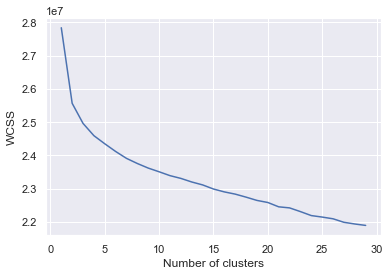

In [17]:
plt.plot(range(1,30), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans_new = KMeans(4)
kmeans.fit(scaler_a)
cluster_new = df_new.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(scaler_a)
cluster_new